## 클러스터링 결과 불러오기

In [ ]:
!pip install koreanize_matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.3 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
df_see = pd.read_csv('/content/drive/MyDrive/DSL/EDA/25-1/data/더미X산업별data/clustered_cos.csv').set_index('업종')
df_beta_scaled = pd.read_csv('/content/drive/MyDrive/DSL/EDA/25-1/data/더미X산업별data/df_beta_scaled.csv').set_index('업종')

In [ ]:
df_beta_scaled.index

Index(['IT_서비스', '건설', '금속', '금융', '기계_장비', '비금속', '섬유_의류', '오락_문화', '운송_창고',
       '운송장비_부품', '유통', '음식료_담배', '일반서비스', '전기_가스', '전기_전자', '제약', '종이_목재',
       '화학'],
      dtype='object', name='업종')

In [ ]:
df_see

,자기자본비율,차입금의존도,매출액증가율,영업이익률,총자본회전율,부채상환능력,log_당좌비율,ROA당기순이익,hc_cluster,silhouette_coeff
업종,,,,,,,,,,
IT_서비스,-0.347381,-0.022014,-1.011320,-0.673756,1.351377,0.265121,-0.980421,-0.693053,1,0.510055
건설,0.199163,0.003823,-0.408447,-0.033771,-0.769466,-0.285760,-0.023875,-0.487227,3,0.529851
금속,0.307698,-0.546152,0.088166,0.130776,0.359158,1.575482,0.281417,0.639641,4,0.522305
금융,0.809334,-0.659287,0.103386,-2.330154,0.040162,0.006133,2.727287,-0.090203,2,0.668203
기계_장비,-1.808590,0.946484,-0.360218,-0.385162,0.783238,-0.493371,-1.000942,0.090203,1,0.634732
비금속,-0.584617,0.840462,1.258901,3.089891,-0.067237,1.156543,-0.276026,2.486471,4,0.440959
섬유_의류,2.652665,-1.616000,0.631089,1.019803,-1.424850,2.880337,0.839731,3.301633,4,0.623841
오락_문화,-0.670145,0.581788,-1.332363,0.162168,0.669050,0.893058,0.413445,-2.754241,1,0.318547
운송_창고,-0.199163,-0.287385,-0.823440,0.477134,-0.040162,0.649823,0.428360,0.751785,4,0.453306


In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00


## 2차원 시각화

In [ ]:
df_beta

,자기자본비율,차입금의존도,매출액증가율,영업이익률,총자본회전율,부채상환능력,log_당좌비율,ROA당기순이익
업종,,,,,,,,
IT_서비스,-0.347381,-0.022014,-1.011320,-0.673756,1.351377,0.265121,-0.980421,-0.693053
건설,0.199163,0.003823,-0.408447,-0.033771,-0.769466,-0.285760,-0.023875,-0.487227
금속,0.307698,-0.546152,0.088166,0.130776,0.359158,1.575482,0.281417,0.639641
금융,0.809334,-0.659287,0.103386,-2.330154,0.040162,0.006133,2.727287,-0.090203
기계_장비,-1.808590,0.946484,-0.360218,-0.385162,0.783238,-0.493371,-1.000942,0.090203
비금속,-0.584617,0.840462,1.258901,3.089891,-0.067237,1.156543,-0.276026,2.486471
섬유_의류,2.652665,-1.616000,0.631089,1.019803,-1.424850,2.880337,0.839731,3.301633
오락_문화,-0.670145,0.581788,-1.332363,0.162168,0.669050,0.893058,0.413445,-2.754241
운송_창고,-0.199163,-0.287385,-0.823440,0.477134,-0.040162,0.649823,0.428360,0.751785


In [ ]:
df_cl = df_see.drop(columns= 'silhouette_coeff')

## 산점도

UMAP, cosine

In [ ]:
import umap.umap_ as umap

# UMAP을 사용한 차원 축소
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.05, n_components=2, metric='cosine', random_state=42)
X_umap = umap_model.fit_transform(df_cl.drop(columns=['hc_cluster']))


# UMAP 결과를 데이터프레임으로 변환
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['Cluster'] = df_cl['hc_cluster'].values  # 클러스터 정보 추가
df_umap['Industry'] = df_cl.index  # 산업명 추가

# 클러스터 색상 지정
palette = {1: 'red', 2: 'blue', 3: 'green', 4: 'purple'}



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


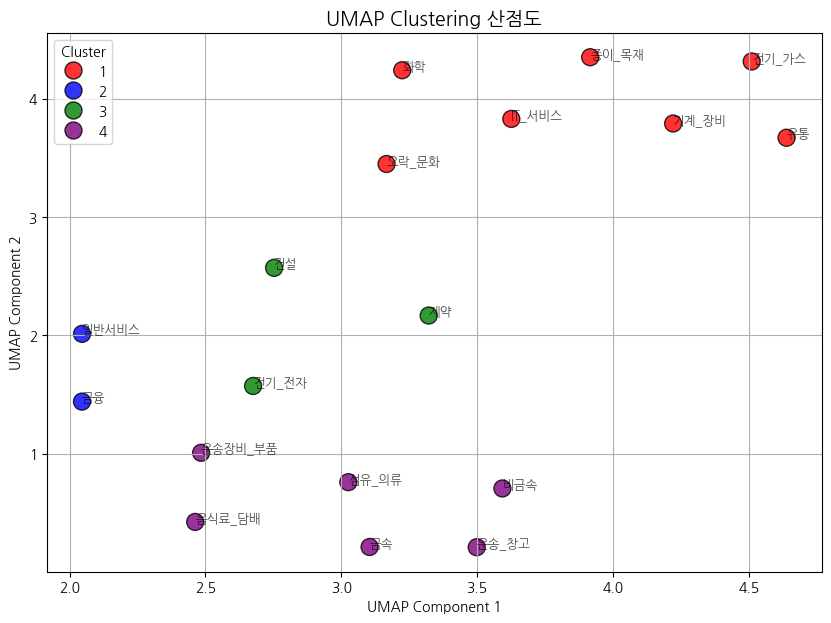

In [30]:
# 클러스터 색상 지정
palette = {1: 'red', 2: 'blue', 3: 'green', 4: 'purple'}

# 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='UMAP1', y='UMAP2', hue='Cluster', palette=palette, data=df_umap, edgecolor='black', s=150, alpha=0.8
)

# 텍스트 라벨 추가 (산업명)
for i in range(len(df_umap)):
    plt.text(df_umap['UMAP1'][i], df_umap['UMAP2'][i], df_umap['Industry'][i], fontsize=9, alpha=0.7)

plt.title('UMAP Clustering Visualization', fontsize=14)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


FA + cosine

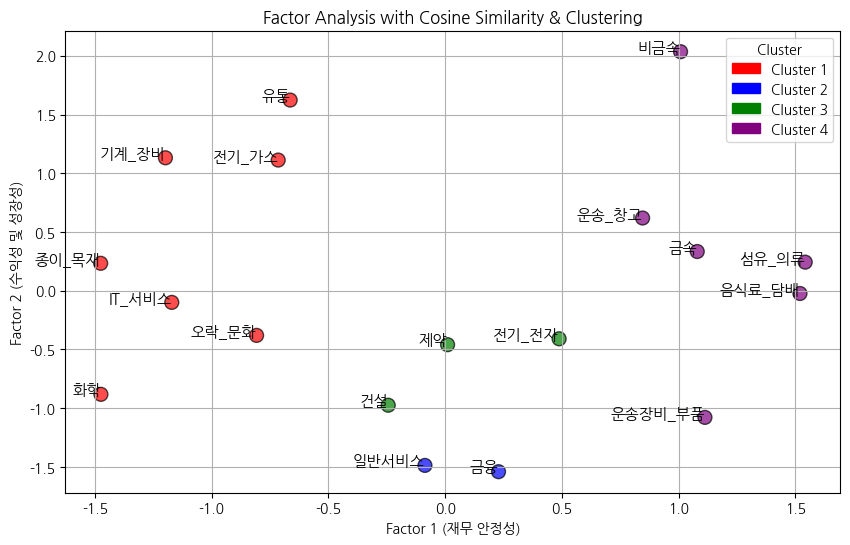

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 1. 베타값 데이터 로드 (스케일링된 데이터 사용)
df_beta = df_beta_scaled.copy()

# 2. Cosine Similarity 행렬 계산
cosine_sim_matrix = cosine_similarity(df_beta)

# 3. FA 모델 적용 (요인 수 선택)
n_factors = 2  # 필요에 따라 조정
fa_model = FactorAnalysis(n_components=n_factors, rotation='varimax')
fa_result = fa_model.fit_transform(cosine_sim_matrix)

# 4. 클러스터링 색상 지정 (빨강-파랑-초록-보라)
cluster_colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'purple'}
colors = [cluster_colors[c] for c in df_cl["hc_cluster"]]




# 5. FA 결과 시각화
plt.figure(figsize=(10,6))
plt.scatter(fa_result[:, 0], fa_result[:, 1], c=colors, s=100, alpha=0.7, edgecolors='k')

# 6. 산업군 이름 라벨링
for i, label in enumerate(df_beta.index):
    plt.text(fa_result[i, 0], fa_result[i, 1], label, fontsize=11, ha='right')

# 7. 그래프 설정
plt.xlabel("Factor 1 (재무 안정성)")
plt.ylabel("Factor 2 (수익성 및 성장성)")
plt.title("Factor Analysis with Cosine Similarity & Clustering")
plt.grid(True)

# 8. 범례 추가
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=color, label=f'Cluster {c}') for c, color in cluster_colors.items()]
plt.legend(handles=legend_patches, title="Cluster")

plt.show()

MDS cosine

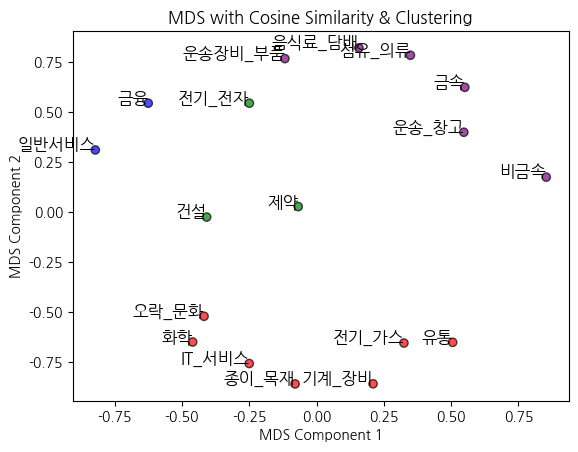

In [ ]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_result = mds.fit_transform(1 - cosine_sim_matrix)  # 코사인 거리 변환

plt.scatter(mds_result[:, 0], mds_result[:, 1], c=colors, alpha=0.7, edgecolors='k')
for i, label in enumerate(df_beta.index):
    plt.text(mds_result[i, 0], mds_result[i, 1], label, fontsize=12, ha='right')
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("MDS with Cosine Similarity & Clustering")
plt.show()

In [ ]:
!pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42622 sha256=adf1eca911c9f7e038905f1841fdd3556ae4e639d5277bfa808dd02818edb760
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer

FA euclid, varimax (선택)

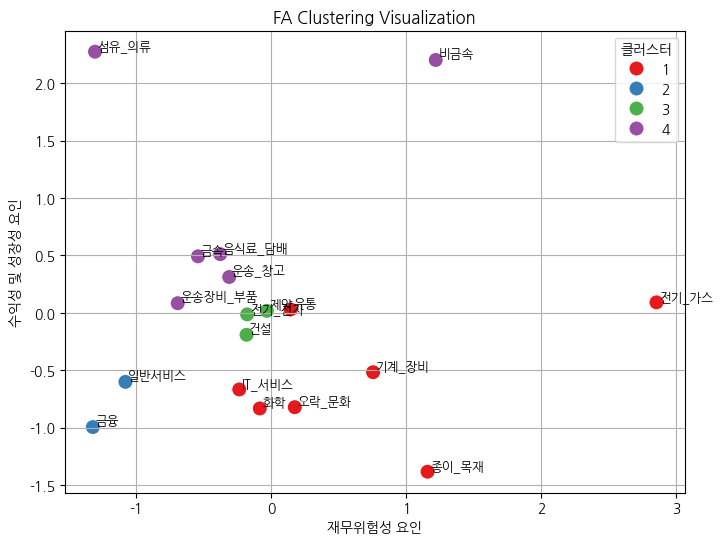

In [32]:
# beta_robust_scaled: RobustScaler로 스케일링한 베타값 DataFrame, 'cluster' 컬럼이 존재한다고 가정
# 예시 데이터 준비 (실제 데이터에 맞게 수정하세요)
# beta_robust_scaled = pd.read_csv("beta_robust_scaled.csv", index_col=0)



# 'cluster' 컬럼을 제외한 데이터로 FA 수행
fa = FactorAnalysis(n_components=2, random_state=42, rotation='varimax')
fa_result = fa.fit_transform(df_beta_scaled)

# 결과 DataFrame 생성: 각 축에 "Factor 1", "Factor 2"라는 이름 부여
fa_df = pd.DataFrame(fa_result, columns=['Factor 1', 'Factor 2'], index=df_see.index)
fa_df['cluster'] = df_see['hc_cluster']

# 산점도 시각화: 클러스터별로 색상 구분하고, 각 업종 이름을 텍스트로 표시
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Factor 1', y='Factor 2', hue='cluster', data=fa_df, palette='Set1', s=120)

# 각 점에 업종 이름을 텍스트로 추가
for industry in fa_df.index:
    plt.text(fa_df.loc[industry, 'Factor 1'] + 0.02,
             fa_df.loc[industry, 'Factor 2'] + 0.02,
             industry, fontsize=9)

plt.title("FA Clustering Visualization")
plt.xlabel("재무위험성 요인")
plt.ylabel("수익성 및 성장성 요인")
plt.legend(title='클러스터')
plt.grid(True)
plt.show()

FA euclid oblimin

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


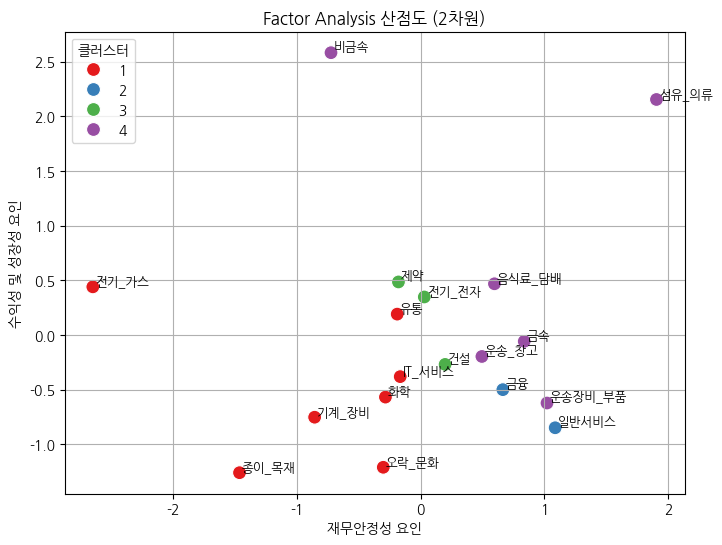

In [ ]:
# 'cluster' 컬럼을 제외한 데이터로 FA 수행
fa = FactorAnalyzer(n_factors=2, rotation='oblimin')
fa_result = fa.fit_transform(df_beta_scaled)

# 결과 DataFrame 생성: 각 축에 "Factor 1", "Factor 2"라는 이름 부여
fa_df = pd.DataFrame(fa_result, columns=['Factor 1', 'Factor 2'], index=df_see.index)
fa_df['cluster'] = df_see['hc_cluster']

# 산점도 시각화: 클러스터별로 색상 구분하고, 각 업종 이름을 텍스트로 표시
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Factor 1', y='Factor 2', hue='cluster', data=fa_df, palette='Set1', s=100)

# 각 점에 업종 이름을 텍스트로 추가
for industry in fa_df.index:
    plt.text(fa_df.loc[industry, 'Factor 1'] + 0.02,
             fa_df.loc[industry, 'Factor 2'] + 0.02,
             industry, fontsize=9)

plt.title("Factor Analysis 산점도 (2차원)")
plt.xlabel("재무안정성 요인")
plt.ylabel("수익성 및 성장성 요인")
plt.legend(title='클러스터')
plt.grid(True)
plt.show()

FA euclid 적재값

Factor Loadings DataFrame:
          Factor 1  Factor 2
자기자본비율   -0.837932  0.469382
차입금의존도    0.974481 -0.237455
매출액증가율    0.215400  0.363024
영업이익률     0.365092  0.831288
총자본회전율   -0.079061 -0.345249
부채상환능력   -0.378259  0.707553
log_당좌비율 -0.994225  0.104830
ROA당기순이익 -0.456342  1.135135


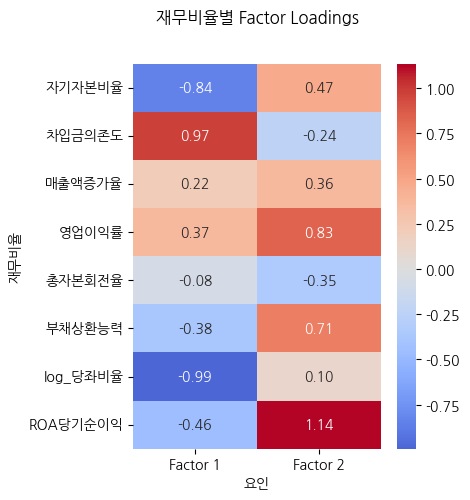

In [ ]:
loadings = fa.components_.T

# Factor 이름 지정 (예: Factor 1, Factor 2)
factor_names = [f"Factor {i+1}" for i in range(loadings.shape[1])]

# 로딩값 DataFrame 생성: index는 재무비율 이름, columns는 Factor 이름
loadings_df = pd.DataFrame(loadings, index=df_beta_scaled.columns, columns=factor_names)

# 로딩값 DataFrame 출력
print("Factor Loadings DataFrame:")
print(loadings_df)

# --- 히트맵 시각화 ---

plt.figure(figsize=(4, 5))
sns.heatmap(loadings_df, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("재무비율별 Factor Loadings", pad=30)
plt.xlabel("요인")
plt.ylabel("재무비율")
plt.show()

In [ ]:
data_prime = df_see

In [ ]:
clusters = data_prime.reset_index().groupby('hc_cluster')['업종'].apply(list)

# 클러스터별 산업 리스트 출력
for cluster, industries in clusters.items():
    print(f"📌 클러스터 {cluster}:")
    print(industries)
    print("-" * 50)

📌 클러스터 1:
['IT_서비스', '기계_장비', '오락_문화', '유통', '전기_가스', '종이_목재', '화학']
--------------------------------------------------
📌 클러스터 2:
['금융', '일반서비스']
--------------------------------------------------
📌 클러스터 3:
['건설', '전기_전자', '제약']
--------------------------------------------------
📌 클러스터 4:
['금속', '비금속', '섬유_의류', '운송_창고', '운송장비_부품', '음식료_담배']
--------------------------------------------------


In [ ]:
cluster_g = data_prime.groupby('hc_cluster')

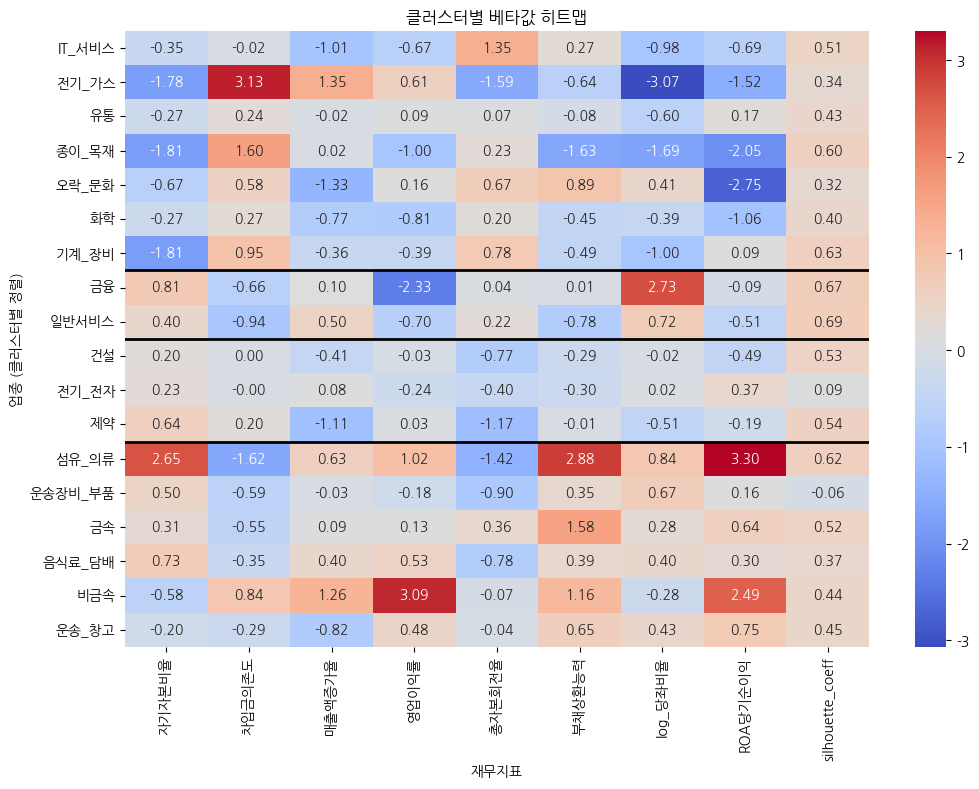

In [ ]:
# 클러스터별로 정렬 (cluster 컬럼 기준)
df_pca = df_see.copy()  # 클러스터 번호가 담긴 컬럼 추가
df_pca= df_pca.sort_values('hc_cluster')

# 히트맵 그리기 (cluster 컬럼은 제외)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(df_pca.drop('hc_cluster', axis=1), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("클러스터별 베타값 히트맵")
plt.xlabel("재무지표")
plt.ylabel("업종 (클러스터별 정렬)")

# 클러스터 경계선 추가하기
# 정렬된 데이터프레임의 'cluster' 컬럼 값을 numpy array로 변환
cluster_labels = df_pca['hc_cluster'].values

# 클러스터가 변경되는 인덱스를 찾습니다.
boundaries = []
prev = cluster_labels[0]
for idx, cl in enumerate(cluster_labels):
    if cl != prev:
        boundaries.append(idx)  # idx가 클러스터 변경 시작 인덱스
        prev = cl

# 히트맵에 수평선 추가 (axhline는 y 좌표에 선을 그림)
for b in boundaries:
    ax.axhline(b, color='black', lw=2)

plt.show()

In [ ]:
p_df = pd.read_csv('/content/drive/MyDrive/DSL/EDA/25-1/data/더미X산업별data/산업별_p값_nonshift_final.csv')

In [ ]:
p_df.set_index('업종', inplace=True)
p_df.index = p_df.index.str.replace("df_코스피_", "")

In [ ]:
p_df

,자기자본비율,차입금의존도,매출액증가율,영업이익률,총자본회전율,부채상환능력,log_당좌비율,ROA당기순이익
업종,,,,,,,,
IT_서비스,0.051232,0.732692,0.582348,0.973863,0.058864,0.607057,0.127110,8.814397e-01
건설,0.665093,0.694555,0.986243,0.209040,0.683197,0.937973,0.929928,8.986336e-01
금속,0.719123,0.313666,0.328234,0.122633,0.173984,0.000900,0.374121,9.185625e-02
금융,0.866902,0.684015,0.779446,0.205897,0.270696,0.775048,0.154148,5.787090e-01
기계_장비,0.013494,0.023950,0.945303,0.622769,0.062710,0.773907,0.143830,5.047904e-01
비금속,0.212656,0.083047,0.082418,0.000189,0.466328,0.068504,0.761209,4.643399e-07
섬유_의류,0.004605,0.012844,0.178318,0.000563,0.381914,0.000002,0.064328,4.392248e-04
오락_문화,0.269927,0.318963,0.248405,0.692047,0.104151,0.370402,0.291970,2.478131e-01
운송_창고,0.475104,0.904869,0.655657,0.418523,0.782177,0.065622,0.527895,2.032988e-01


In [ ]:
df_see

,자기자본비율,차입금의존도,매출액증가율,영업이익률,총자본회전율,부채상환능력,log_당좌비율,ROA당기순이익,hc_cluster,silhouette_coeff
업종,,,,,,,,,,
IT_서비스,-0.347381,-0.022014,-1.011320,-0.673756,1.351377,0.265121,-0.980421,-0.693053,1,0.510055
건설,0.199163,0.003823,-0.408447,-0.033771,-0.769466,-0.285760,-0.023875,-0.487227,3,0.529851
금속,0.307698,-0.546152,0.088166,0.130776,0.359158,1.575482,0.281417,0.639641,4,0.522305
금융,0.809334,-0.659287,0.103386,-2.330154,0.040162,0.006133,2.727287,-0.090203,2,0.668203
기계_장비,-1.808590,0.946484,-0.360218,-0.385162,0.783238,-0.493371,-1.000942,0.090203,1,0.634732
비금속,-0.584617,0.840462,1.258901,3.089891,-0.067237,1.156543,-0.276026,2.486471,4,0.440959
섬유_의류,2.652665,-1.616000,0.631089,1.019803,-1.424850,2.880337,0.839731,3.301633,4,0.623841
오락_문화,-0.670145,0.581788,-1.332363,0.162168,0.669050,0.893058,0.413445,-2.754241,1,0.318547
운송_창고,-0.199163,-0.287385,-0.823440,0.477134,-0.040162,0.649823,0.428360,0.751785,4,0.453306


## 레이더 차트

In [ ]:
#레이더 차트

def make_radar_chart(categories, values, title):
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    ax.set_title(title)
    ax.set_title(title, pad=30)  # 필요에 따라 pad 값을 조정
    ax.grid(True)
    plt.show()

In [ ]:
df_cl = data_prime.drop(columns='silhouette_coeff')

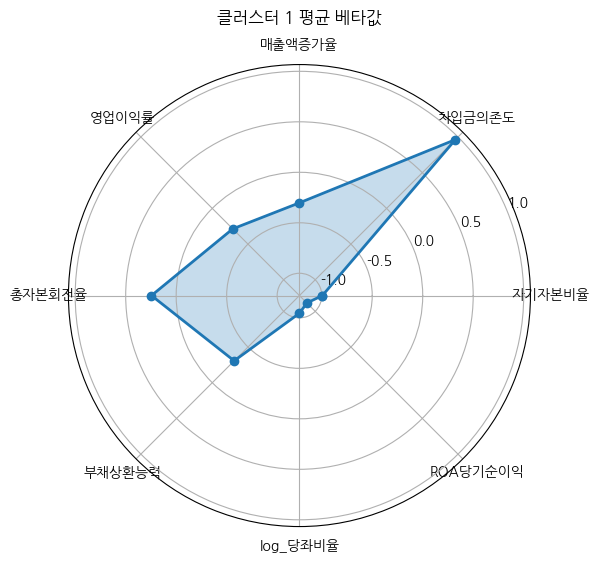

In [ ]:
cluster1_data = df_cl[df_cl['hc_cluster'] == 1].drop('hc_cluster', axis=1).mean()
categories = list(cluster1_data.index)
values = cluster1_data.values
make_radar_chart(categories, values, "클러스터 1 평균 베타값")

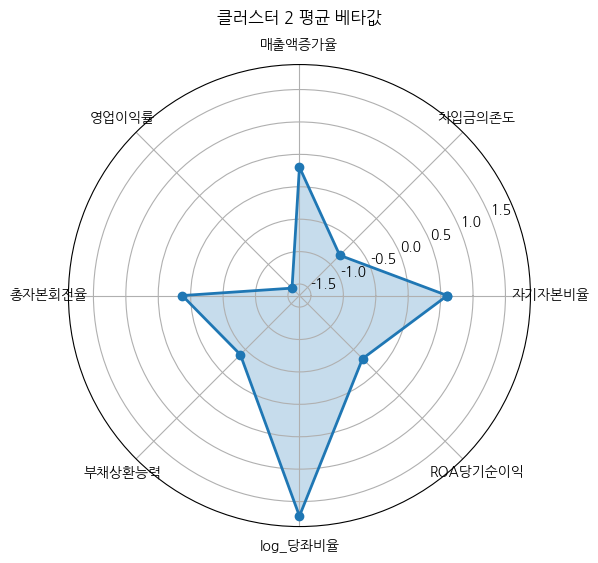

In [ ]:
# 예시: 각 클러스터의 평균 베타값 (여기서는 클러스터 2, 전기_가스만 단독으로 예시)

cluster2_data = df_cl[df_cl['hc_cluster'] == 2].drop('hc_cluster', axis=1).mean()
categories = list(cluster2_data.index)
values = cluster2_data.values
make_radar_chart(categories, values, "클러스터 2 평균 베타값")

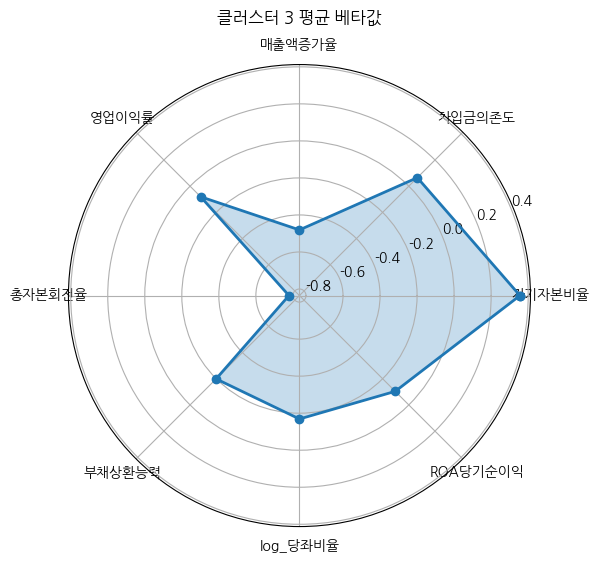

In [ ]:
cluster3_data = df_cl[df_cl['hc_cluster'] == 3].drop('hc_cluster', axis=1).mean()
categories = list(cluster3_data.index)
values = cluster3_data.values
make_radar_chart(categories, values, "클러스터 3 평균 베타값")

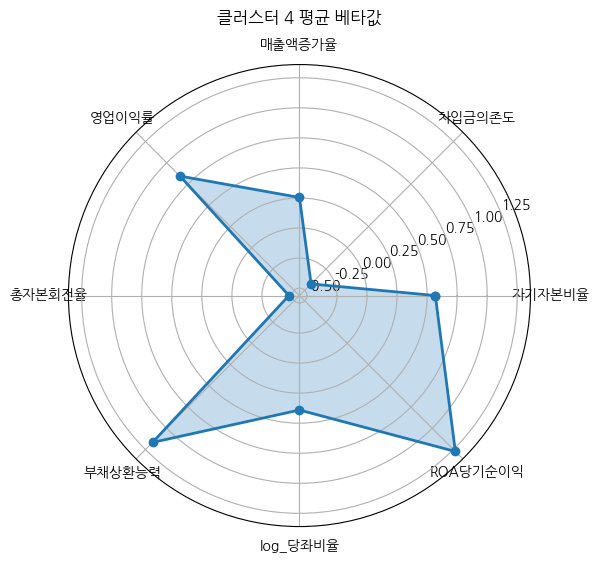

In [ ]:
cluster4_data = df_cl[df_cl['hc_cluster'] == 4].drop('hc_cluster', axis=1).mean()
categories = list(cluster4_data.index)
values = cluster4_data.values
make_radar_chart(categories, values, "클러스터 4 평균 베타값")

클러스터 1(IT·제조업 등) → ESG 투자가 자본 활용을 증가시키지만, 단기 재무 성과 개선 효과는 미미할 가능성.
클러스터 2(금융·일반서비스) → ESG가 자본비율을 높이지만 영업이익률 감소가 뚜렷하며, 이는 장기적인 리스크 관리 효과 때문일 가능성이 큼.
클러스터 3(건설·전기·전자·제약) → ESG가 재무 안정성을 강화하지만, 초기 투자 비용 증가로 단기 수익성 및 성장성에는 부정적 영향을 줄 가능성이 있음.
클러스터 4(소비재·운송·제조업) → ESG가 수익성과 재무 안정성을 동시에 개선하는 긍정적 효과를 보이며, 시장 경쟁력과 브랜드 가치를 높이는 역할을 할 가능성이 큼.
